In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('../data/dmr.xlsx')
df['high_impact'] = df['number_of_fatalities'].apply(lambda x: 0 if x == 1 else 1)

# Using Decision Tree and Logistic Regression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

target = df['high_impact']

df.drop(['high_impact', 'number_of_fatalities'], axis = 1, inplace = True)

features_column = ['type','month', 'day', 'hour', 'time', 'speeding', 'ran_red_light', 'dl_status', 'suspected_impairment',
       'restraint_type', 'type_of_road', 'ftsra']

features = df[features_column]

features = pd.get_dummies(features)


In [4]:

# Assuming 'target' is the target variable you want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))


Decision Tree Accuracy: 0.9532710280373832
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       101
           1       1.00      0.17      0.29         6

    accuracy                           0.95       107
   macro avg       0.98      0.58      0.63       107
weighted avg       0.96      0.95      0.94       107

Logistic Regression Accuracy: 0.9345794392523364
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       101
           1       0.00      0.00      0.00         6

    accuracy                           0.93       107
   macro avg       0.47      0.50      0.48       107
weighted avg       0.89      0.93      0.91       107



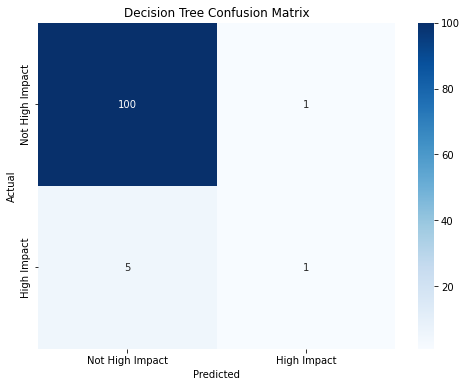

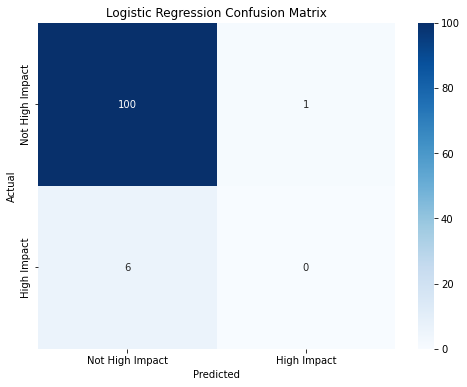

In [9]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix and Heatmap for Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High Impact', 'High Impact'], yticklabels=['Not High Impact', 'High Impact'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix and Heatmap for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High Impact', 'High Impact'], yticklabels=['Not High Impact', 'High Impact'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

# Assuming features_column is a list of feature names
feature_names = features.columns.tolist()

# Lime Interpretabilities for what features are the most important
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['0', '1'], discretize_continuous=True)

# Choose a specific instance for explanation
instance_to_explain = X_test.iloc[0]

# Explain Decision Tree prediction
dt_exp = explainer.explain_instance(instance_to_explain.values, dt_model.predict_proba, num_features=len(feature_names))
dt_exp_top_features = dt_exp.as_list()[:5]  # Extract the top 5 features
print("Decision Tree Top 5 Features Explanation:")
for feature, weight in dt_exp_top_features:
    print(f"{feature}: {weight}")

# Explain Logistic Regression prediction
lr_exp = explainer.explain_instance(instance_to_explain.values, lr_model.predict_proba, num_features=len(feature_names))
lr_exp_top_features = lr_exp.as_list()[:5]  # Extract the top 5 features
print("\nLogistic Regression Top 5 Features Explanation:")
for feature, weight in lr_exp_top_features:
    print(f"{feature}: {weight}")


/Users/thangtruong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree Top 5 Features Explanation:
time_22:21:00 <= 0.00: -0.930720515131178
time_19:31:00 <= 0.00: -0.9245393898034062
time_22:01:00 <= 0.00: -0.9047940787307089
suspected_impairment_both PEDs <= 0.00: -0.8941100661397572
time_23:25:00 <= 0.00: -0.8868106842168973

Logistic Regression Top 5 Features Explanation:
month_apr <= 0.00: -0.03249925974717301
restraint_type_seatbelt worn <= 0.00: -0.030774671440317827
suspected_impairment_both PEDs <= 0.00: -0.029228161988243892
time_02:36:00 <= 0.00: -0.027315172891091238
time_22:21:00 <= 0.00: -0.026433834731611094


/Users/thangtruong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
